In [2]:
import pandas as pd
hr = pd.read_csv('HR_comma_sep.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr=hr.rename(columns = {'sales':'department'})   #changed the column name

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr.shape  #rows,col

(14999, 10)

In [6]:
hr['department'].unique() #uniquevalues in col department

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
# replace support & IT to technical 
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [8]:
hr['department'].unique() #uniquevalues in col department

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
#categorical values to numerical
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [10]:
#Now the actual variables need to be removed after the dummy variable have been created.#
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Define target variable (outcome)
y = hr['left'].values.ravel()  # Convert to 1D array

# Define predictor variables (features)
X = hr.drop(columns=['left'])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale features (Logistic Regression works better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define model with increased iterations
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Apply RFE (select top 10 features)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe = rfe.fit(X_scaled, y)

# Print results
print("Selected Features:", rfe.support_)
print("Feature Rankings:", rfe.ranking_)


Selected Features: [ True  True  True  True  True  True  True  True False False False False
 False False False  True  True False]
Feature Rankings: [1 1 1 1 1 1 1 1 8 3 2 9 4 7 6 1 1 5]


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Check available columns
print("Available columns:", hr.columns)

# Use correct target column name (update 'left' if it's different)
X = hr.drop(columns=['left'])
y = hr['left'].values.ravel()  # Convert y to 1D array

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define model with increased iterations
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Apply RFE (select top 10 features)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe = rfe.fit(X_scaled, y)

# Print results
print("Selected Features:", rfe.support_)
print("Feature Rankings:", rfe.ranking_)


Available columns: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')
Selected Features: [ True  True  True  True  True  True  True  True False False False False
 False False False  True  True False]
Feature Rankings: [1 1 1 1 1 1 1 1 8 3 2 9 4 7 6 1 1 5]


In [13]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7704444444444445


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with updated parameters
clf = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=1e-07,  # ✅ Corrected parameter
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=10,
    n_jobs=1,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)


In [17]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.979


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.96      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



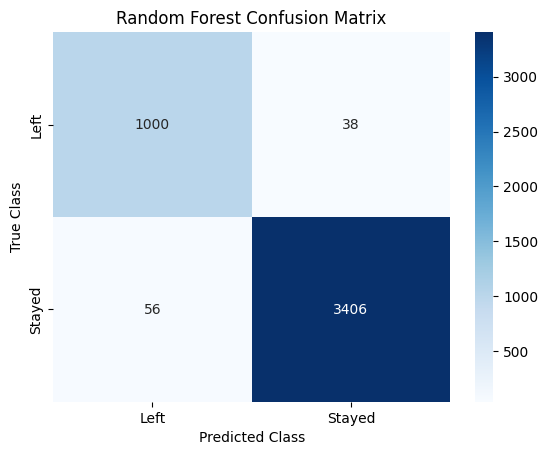

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
forest_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Ensure correct order

# Plot heatmap
sns.heatmap(forest_cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])

# Labels and title
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [26]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.50      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



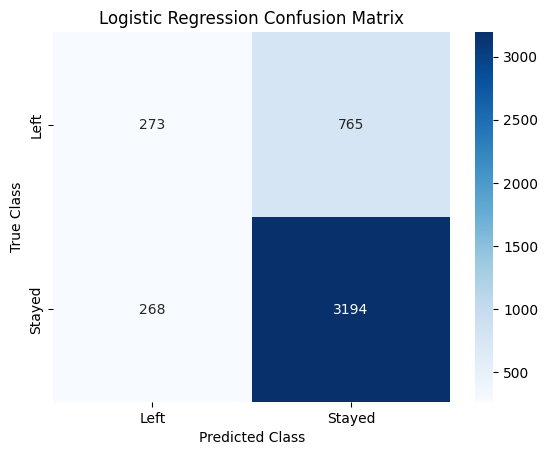

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict using Logistic Regression
logreg_y_pred = logreg.predict(X_test)

# Compute confusion matrix
logreg_cm = confusion_matrix(y_test, logreg_y_pred, labels=[1, 0])  # Ensure correct order

# Plot heatmap
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])

# Labels and title
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


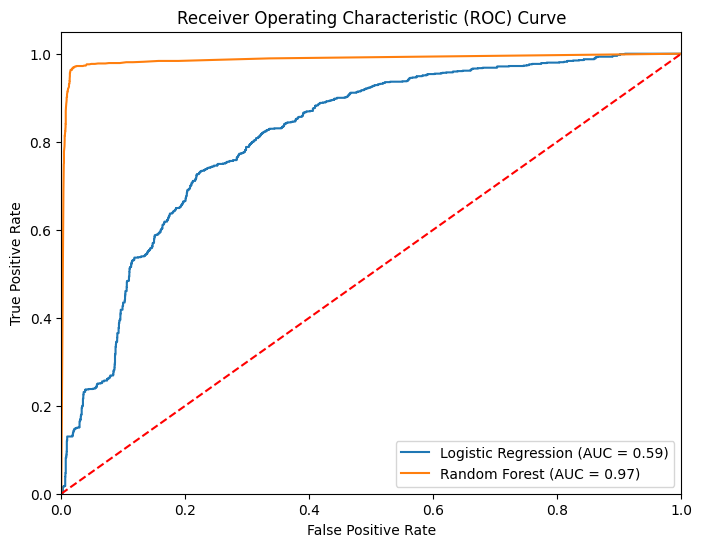

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure y_test is binary
y_test = (y_test == 1).astype(int)

# Compute ROC-AUC for Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

# Compute ROC-AUC for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal reference line

# Labels & Title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [31]:
import numpy as np

# Ensure feature_labels matches the number of features in X_train
feature_labels = np.array(X_train.columns)  # Automatically fetch feature names

# Get feature importance scores
importance = rf.feature_importances_

# Sort feature indexes by importance (ascending order)
feature_indexes_by_importance = np.argsort(importance)

# Print feature importances in sorted order
print("Feature Importance Ranking:")
for index in feature_indexes_by_importance[::-1]:  # Reverse for descending order
    print(f'{feature_labels[index]}: {importance[index]*100:.2f}%')


Feature Importance Ranking:
satisfaction_level: 49.57%
time_spend_company: 27.02%
last_evaluation: 18.68%
Work_accident: 1.59%
salary_low: 1.29%
salary_high: 0.68%
department_RandD: 0.34%
department_hr: 0.32%
promotion_last_5years: 0.25%
department_management: 0.25%
